In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', None)

In [2]:
import os

pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

# df = pd.read_csv('real_estate_data.csv', sep='\t') # Подгружаю датасет, ознакамливаюсь с данными
df.head(1000)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,10150000.0,105.0,2017-11-26T00:00:00,4,NaN,5.0,75.0,2,NaN,...,10.0,NaN,Санкт-Петербург,15957.0,8955.0,0.0,NaN,0.0,NaN,58.0
996,14,2200000.0,54.0,2017-06-03T00:00:00,2,2.70,2.0,39.0,1,False,...,10.0,0.0,посёлок городского типа Сиверский,NaN,NaN,NaN,NaN,NaN,NaN,91.0
997,16,9000000.0,79.0,2018-01-15T00:00:00,3,NaN,18.0,46.0,11,NaN,...,10.0,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,8.0
998,10,2300000.0,30.6,2017-04-26T00:00:00,1,2.50,5.0,17.0,1,False,...,5.5,0.0,Петергоф,37242.0,32432.0,1.0,1731.0,3.0,407.0,162.0


In [3]:
# Определяю тип данных в каждом столбце
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим большое количество пропусков в данных 

In [4]:
# Анализирую каждый из столбцов
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Замеченные аномалии в данных:
1) Странный формат данных в столбце “last_price” <br>
2) Квартира площадью 900 кв.м.<br>
3) 19-ти комнатная квартира<br>
4) 100-метровые потолки

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# Изменяю название одной из колонок
df = df.rename(columns={"cityCenters_nearest":"city_centers_nearest"})

In [7]:
# Проверяю, что название изменилось
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
# В случае, если количество балконов не указано, то заменяю значение на 0
df['balcony'] = df['balcony'].fillna(0) 

In [9]:
# Проверяем, что замена прошла
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [10]:
pd.to_datetime(df['first_day_exposition']) # Необходимо заменить формат даты 

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

## Причины, которые привели к пропускам данных:
1.  Отсутсвие необходимости заполнять все строки при подаче объявления <br>
- является апартаментами либо нет<br>
- несвоевременное закрытие объявления (после фактической продажи)<br>
- площадь кухни, площадь жилой зоны (по отдельности)<br>
2. Отсутствие знаний клиента о некоторых параметрах жилья, которое он выставляет на продажу
3. Технические проблемы во время отправки данных и обработки данных системой (Геолокация, удалённость от различных объектов) <br>
4. Возможно, некорректное указание данных расположения квартиры, что мешает подсчёту расстояний до различных объектов 

In [11]:
# Добавляю в таблицу стоимость квадратного метра
df['square_meter_cost'] = round(df['last_price'] / df['total_area'], 0)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95066.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99196.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87455.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0


In [12]:
# Изменяю формат данных, для удобной работы с ними:

df['last_price'] = df[df['last_price'].notnull()]['last_price'].astype('int')
df['floors_total'] = df[df['floors_total'].notnull()]['floors_total'].astype('int')
df['balcony'] = df[df['balcony'].notnull()]['balcony'].astype('int')
df['square_meter_cost'] = df[df['square_meter_cost'].notnull()]['square_meter_cost'].astype('int')

df['total_area'] = df[df['total_area'].notnull()]['total_area'].round(1)
df['ceiling_height'] = df[df['ceiling_height'].notnull()]['ceiling_height'].round(1)
df['living_area'] = df[df['living_area'].notnull()]['living_area'].round(1)
df['kitchen_area'] = df[df['kitchen_area'].notnull()]['kitchen_area'].round(1)

In [13]:
# Добавляю в таблицу день недели, месяц и год публикации объявления

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

df['day_of_publication'] = df['first_day_exposition'].dt.day_name()
df['month_of_publication'] = df['first_day_exposition'].dt.month_name()
df['year_of_publication'] = df['first_day_exposition'].dt.year

In [14]:
# Смотрю как изменилось представление данных в таблице
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_cost,day_of_publication,month_of_publication,year_of_publication
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,Thursday,March,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82921,Tuesday,December,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786,Thursday,August,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,Friday,July,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,Tuesday,June,2018


In [15]:
# Нахожу зависимость средней цены от года публикации
df.groupby('year_of_publication')['last_price'].mean().sort_values(ascending=True).round()

year_of_publication
2018     5950966.0
2017     6585729.0
2019     6782388.0
2016     6827912.0
2015     8572833.0
2014    12087136.0
Name: last_price, dtype: float64

В 2014 году был высокий спрос на квартиры, цены были высокими. В дальнейшем цены на недвижимость постепенно падали

In [16]:
# Нахожу зависимость средней цены от месяца публикации
df.groupby('month_of_publication')['last_price'].mean().sort_values(ascending=True).round()

month_of_publication
October      6235013.0
June         6310269.0
August       6350233.0
March        6359275.0
November     6461363.0
February     6468500.0
May          6600435.0
July         6649337.0
January      6668233.0
April        6737198.0
September    6825470.0
December     7011731.0
Name: last_price, dtype: float64

Можно заметить, что люди выставляют более высокие цены на квартиры к концу года

In [17]:
# Нахожу зависимость средней цены от дня публикации
df.groupby('day_of_publication')['last_price'].mean().sort_values(ascending=True).round()

day_of_publication
Sunday       6246180.0
Friday       6372131.0
Tuesday      6394233.0
Monday       6511613.0
Wednesday    6627970.0
Thursday     6708663.0
Saturday     6976804.0
Name: last_price, dtype: float64

Во время рабочей недели люди выставляют квартиры с более дорогими ценами

In [18]:
# Добавляю в таблицу этаж квартиры в текстовом формате (первый, последний, другой)

full_floor = []
x = 0
for value in df['floor']:
    if value == 1:
        full_floor.append('Первый')
    elif value == df['floors_total'][x]:
        full_floor.append('Последний')
    else:
        full_floor.append('Другое')
    x += 1
        
df['full_floor'] = full_floor

In [19]:
# Проверяю как отработал цикл

# display(df[df['full_floor'] == 'Первый'])
# display(df[df['full_floor'] == 'Последний'])
# display(df[df['full_floor'] == 'Другое'])

In [20]:
# Добавляю в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

df['living_total_ratio'] = round(df['living_area'] / df['total_area'], 2) * 100
df['kitchen_total_ratio'] = round(df['kitchen_area'] / df['total_area'], 2) * 100

In [21]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'square_meter_cost',
       'day_of_publication', 'month_of_publication', 'year_of_publication',
       'full_floor', 'living_total_ratio', 'kitchen_total_ratio'],
      dtype='object')

In [22]:
# Меняю колонки местами для удобства работы

column_names = ['total_images',
                'last_price',
                'total_area',
                'first_day_exposition',
                'days_exposition',
                'day_of_publication',
                'month_of_publication',
                'year_of_publication',
                'rooms',
                'ceiling_height',
                'floors_total',
                'floor',
                'full_floor',
                'living_area',
                'living_total_ratio',
                'kitchen_area',
                'kitchen_total_ratio',
                'is_apartment',
                'studio', 'open_plan',
                'balcony',
                'locality_name',
                'airports_nearest',
                'city_centers_nearest',
                'parks_around3000',
                'parks_nearest',
                'ponds_around3000',
                'ponds_nearest',
                'square_meter_cost']

df = df.reindex(columns=column_names)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'days_exposition', 'day_of_publication', 'month_of_publication',
       'year_of_publication', 'rooms', 'ceiling_height', 'floors_total',
       'floor', 'full_floor', 'living_area', 'living_total_ratio',
       'kitchen_area', 'kitchen_total_ratio', 'is_apartment', 'studio',
       'open_plan', 'balcony', 'locality_name', 'airports_nearest',
       'city_centers_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'square_meter_cost'],
      dtype='object')

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

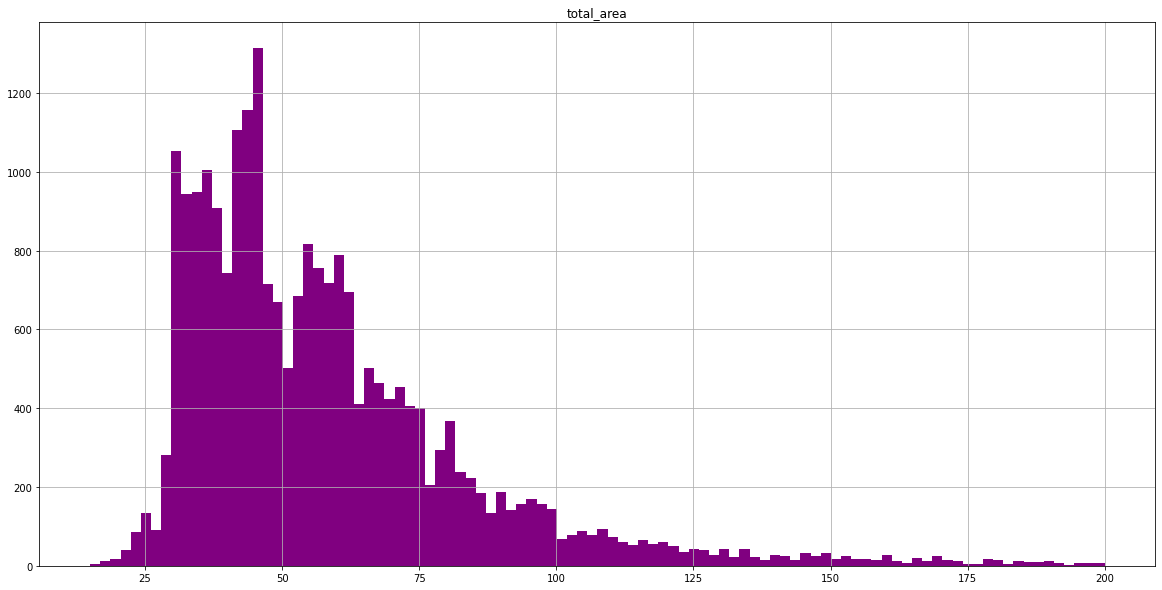

In [23]:
# Распределение квартир по общей площади

df.hist(column='total_area', bins=100, range=(15,200), figsize=(20, 10), grid=True, color='purple')

Из данного графика можно сделать вывод о том, что площадь подавляющего количества квартир на рынке от 30 до 75 квадратных метров. 

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

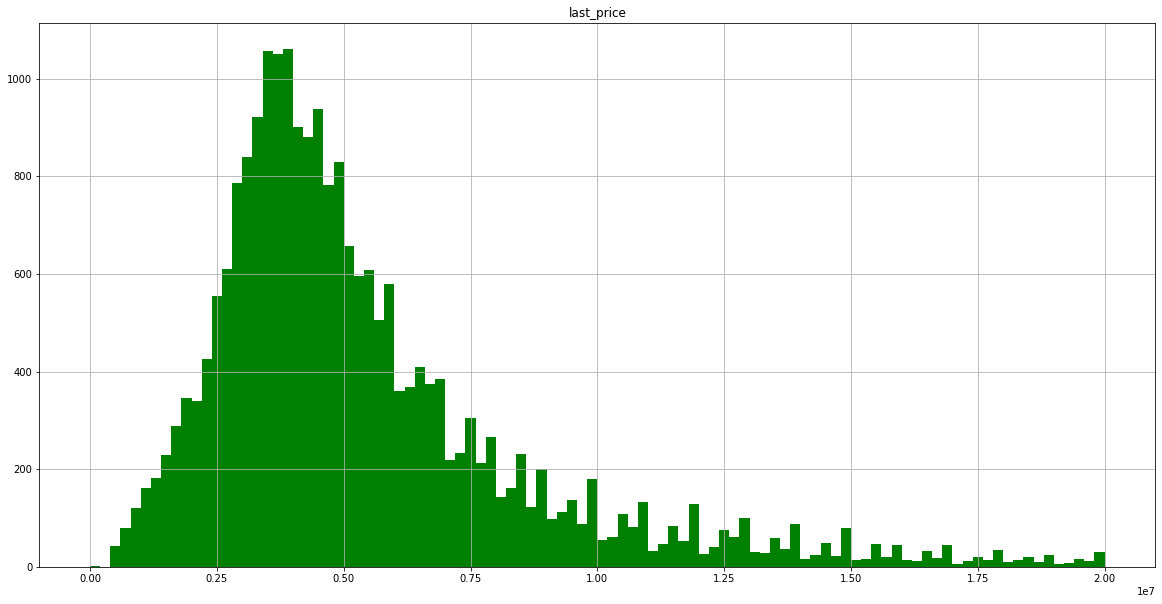

In [24]:
# Распределение квартир по ценам

df.hist(column='last_price', range=(1, 20000000), bins=100, figsize=(20, 10), grid=True, color='green')
# df['last_price'].describe()


Задаю ограничение по стоимости до 20 млн.руб., чтобы с гистограммой можно было работать

Из данного графика становится очевидно, что большинство квартир на рынке продаются от 2 млн. руб.  до 7,5 млн. руб. 

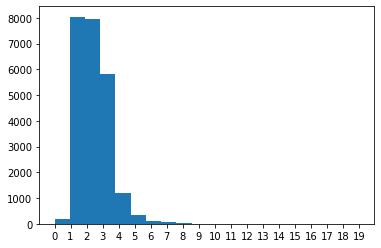

In [25]:
# Распределение квартир по числу комнат

data_rooms = df['rooms']

plt.hist(data_rooms, bins=20)
plt.xticks(range(0,20))
plt.show()

In [26]:
# Проверяю, что гистограмма была построена правильно
df['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Можно сделать вывод, что наибольшей популярностью на рынке пользуются 1-комнатные, 2-комнатные и 3-комнатные квартиры. Процент 4-комнатных квартир на рынке значительно ниже. Количество квартир с 5-ю комнатами и более несравнимо ниже.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

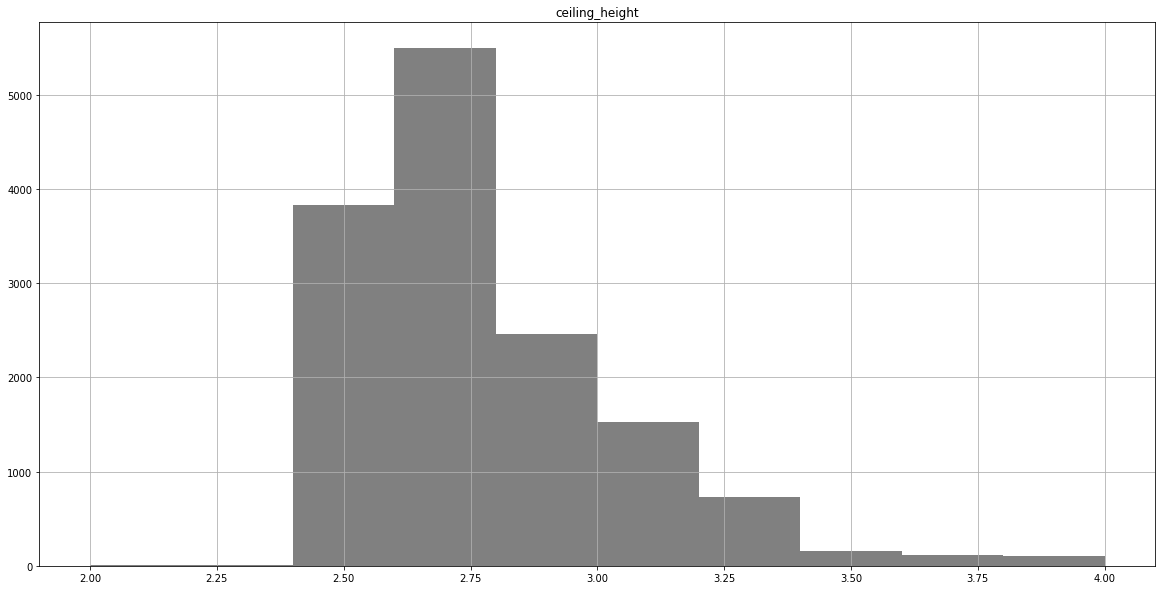

In [27]:
# Распределение квартир по высоте потолков

df.hist(column='ceiling_height', range=(2, 4), bins=10, figsize=(20, 10), grid=True, color='grey')
# df["ceiling_height"].describe()

In [28]:
df['ceiling_height'].value_counts().sort_index()

1.0         1
1.2         1
1.8         1
2.0        11
2.2         2
2.3         5
2.4        38
2.5      3792
2.6      3734
2.7      1759
2.8      2247
2.9       213
3.0      1241
3.1       285
3.2       407
3.3       182
3.4       138
3.5       157
3.6        73
3.7        38
3.8        37
3.9        19
4.0        48
4.1         5
4.2        14
4.3         1
4.4         6
4.5         7
4.6         1
4.7         2
4.8         1
4.9         1
5.0         1
5.2         1
5.3         2
5.5         1
5.6         1
5.8         1
6.0         1
8.0         3
8.3         1
10.3        1
14.0        1
20.0        1
22.6        1
24.0        1
25.0        7
26.0        1
27.0        8
27.5        1
32.0        2
100.0       1
Name: ceiling_height, dtype: int64

Реальная высота потолков начинается от двух метров и заканчивается на 4,5 метрах. Остальные данные можно считать “выбросами”. Разумеется, что квартир с потолками 32м или 100м не существует. 

In [29]:
# Изучаю среднее время продажи квартиры, нахожу средние и медиану. Определяю время “быстрой” и “медленной” продажи. 

# среднее время продажи квартиры
round(df['days_exposition'].mean() , 0)

181.0

In [30]:
# Медианое значение времени продажи квартиры
df['days_exposition'].median()

95.0

In [31]:
df["days_exposition"].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Не думаю, что на эти значения можно полагаться, так как в столбце большое количество пропусков значений. Также многие пользователи могут вовсе не закрывать свои объявления во время. <br>
Среднее время продажи квартиры занимает порядка **6 месяцев**.<br>
Медианное  время продажи квартиры занимает чуть **больше 3-х месяцев**.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

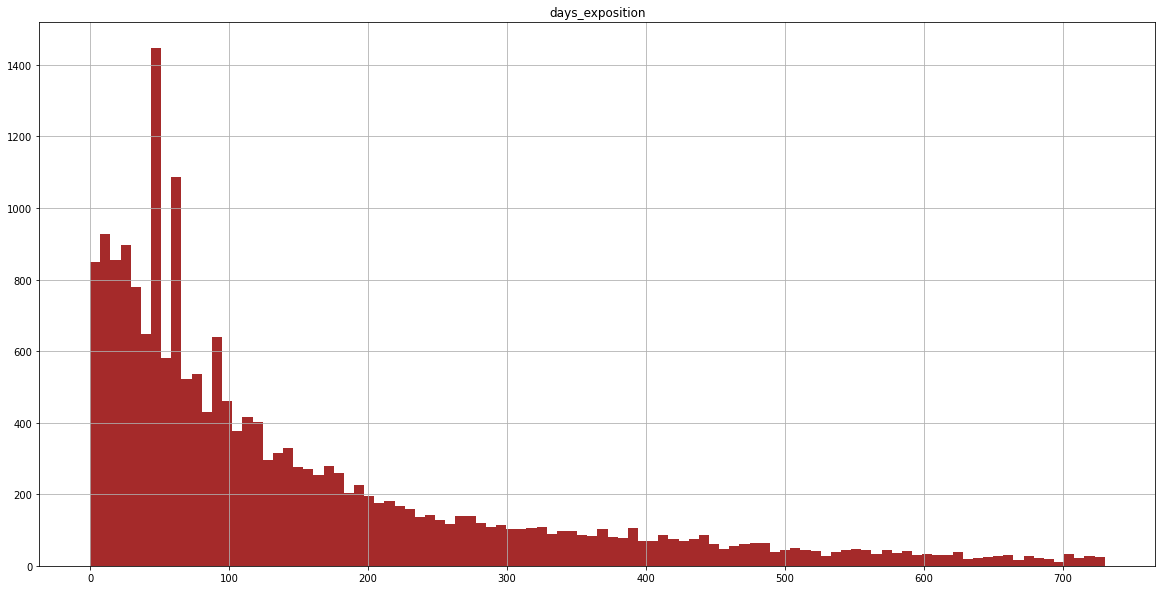

In [32]:
# Определяю время “медленной” и “быстрой” продажи. Отбрасываю объявления со сроком продажи более двух лет.
df.hist(column='days_exposition', range=(0, 730), bins=100, figsize=(20, 10), grid=True, color='brown')

Можно утверждать, что если квартира продалась в течении 3-х месяцев, то продажу можно называть “быстрой”.
Если прошло более 3х месяцев, то продажа - “медленная”. 

In [33]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

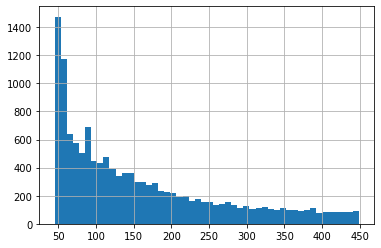

In [34]:

df_norm =df[(df['days_exposition']<450) &(df['days_exposition']>45)]
df_norm['days_exposition'].hist(bins=50)
plt.show()

In [35]:
df_normalized = df.query("last_price<20000000 and total_area<200 and rooms<7 and balcony<3")

In [36]:
print("Стало:", df_normalized.shape[0])
print("Проценты от исходных: {:.0%}".format(df_normalized.shape[0]/df.shape[0]))

Стало: 22387
Проценты от исходных: 94%


## Рассмотрим зависимость факторов, влияющих на стоимость квартиры:
1. Площадь квартиры
2. Число комнат
3. Удалённость от центра
4. Расположение на определённом этаже (первый, последний, другое)
5. Зависимость цены от даты размещение (день недели, месяц, год)

In [37]:
df_normalized.describe()

,total_images,last_price,total_area,days_exposition,year_of_publication,rooms,ceiling_height,floors_total,floor,living_area,...,kitchen_area,kitchen_total_ratio,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,square_meter_cost
count,22387.00000,2.238700e+04,22387.000000,19520.000000,22387.000000,22387.000000,13558.000000,22303.000000,22387.000000,20612.000000,...,20211.000000,20211.000000,22387.000000,16986.000000,17003.000000,17004.000000,7332.000000,17004.000000,8357.000000,22387.000000
mean,9.74512,5.333654e+06,55.830571,177.506404,2017.373833,1.983428,2.748163,10.705959,5.862688,32.001033,...,10.028984,18.895057,0.504177,28824.924820,14499.560254,0.583451,493.618112,0.742002,524.970085,94723.808326
std,5.60293,3.119838e+06,23.096736,216.279742,1.031670,0.958042,0.926983,6.631558,4.885127,15.755578,...,4.571963,7.213423,0.756589,12806.076592,8586.672088,0.780677,342.409944,0.917626,277.035599,32552.787197
min,0.00000,1.219000e+04,12.000000,1.000000,2014.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,1.300000,4.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,112.000000
25%,6.00000,3.370000e+06,39.400000,44.000000,2017.000000,1.000000,2.500000,5.000000,2.000000,18.300000,...,7.000000,14.000000,0.000000,18399.000000,9816.000000,0.000000,289.750000,0.000000,304.000000,75862.000000
50%,9.00000,4.500000e+06,50.200000,93.000000,2017.000000,2.000000,2.600000,9.000000,4.000000,29.900000,...,9.000000,17.000000,0.000000,26765.500000,13285.000000,0.000000,456.000000,0.000000,510.000000,94000.000000
75%,14.00000,6.400000e+06,66.200000,226.000000,2018.000000,3.000000,2.800000,16.000000,8.000000,41.000000,...,11.400000,23.000000,1.000000,37429.750000,16465.000000,1.000000,614.000000,1.000000,733.000000,111996.000000
max,50.00000,1.999900e+07,199.200000,1553.000000,2019.000000,6.000000,32.000000,60.000000,33.000000,159.600000,...,60.000000,79.000000,2.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,392354.000000


In [38]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22387 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22387 non-null  int64         
 1   last_price            22387 non-null  int64         
 2   total_area            22387 non-null  float64       
 3   first_day_exposition  22387 non-null  datetime64[ns]
 4   days_exposition       19520 non-null  float64       
 5   day_of_publication    22387 non-null  object        
 6   month_of_publication  22387 non-null  object        
 7   year_of_publication   22387 non-null  int64         
 8   rooms                 22387 non-null  int64         
 9   ceiling_height        13558 non-null  float64       
 10  floors_total          22303 non-null  float64       
 11  floor                 22387 non-null  int64         
 12  full_floor            22387 non-null  object        
 13  living_area     

In [39]:
df_normalized.corr().sort_values(by='last_price')

,total_images,last_price,total_area,days_exposition,year_of_publication,rooms,ceiling_height,floors_total,floor,living_area,...,studio,open_plan,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,square_meter_cost
city_centers_nearest,-0.036108,-0.360056,-0.204824,-0.049267,0.025548,-0.141380,-0.120208,0.006027,0.006317,-0.199881,...,-0.009936,-0.003811,0.066903,0.273084,1.000000,-0.136569,-0.052904,-0.046019,0.005788,-0.390789
kitchen_total_ratio,-0.024068,-0.112507,-0.375735,-0.041243,0.020237,-0.628242,0.003638,0.368139,0.261057,-0.574404,...,NaN,NaN,0.085232,0.051930,0.009035,-0.080721,0.055187,0.001988,-0.020126,0.270283
ponds_nearest,0.008528,-0.090087,-0.056417,-0.079369,0.038922,-0.023934,-0.069008,0.032078,0.023812,-0.038251,...,0.000752,-0.002987,0.027984,0.016287,0.005788,-0.153570,0.005508,-0.329705,1.000000,-0.071162
studio,-0.028927,-0.059384,-0.099402,-0.022109,0.011874,-0.163160,0.004756,0.071428,0.038513,-0.068020,...,1.000000,-0.004417,0.047109,-0.022492,-0.009936,-0.029450,0.009146,0.003264,0.000752,0.036680
open_plan,-0.023031,-0.039582,-0.060340,-0.023848,-0.021968,-0.098722,0.061505,0.052944,0.037885,-0.039911,...,-0.004417,1.000000,0.050727,-0.013954,-0.003811,-0.012335,0.011234,0.007113,-0.002987,0.013401
airports_nearest,-0.001664,-0.037808,-0.027022,-0.018373,0.009615,-0.057765,-0.034292,0.109071,0.070956,-0.060292,...,-0.022492,-0.013954,0.045641,1.000000,0.273084,0.009694,-0.077046,-0.052470,0.016287,-0.041058
year_of_publication,0.148618,-0.027254,-0.078882,-0.607080,1.000000,-0.048509,-0.023236,0.002386,0.003591,-0.065546,...,0.011874,-0.021968,-0.008095,0.009615,0.025548,-0.028836,-0.033311,-0.034878,0.038922,0.055782
balcony,0.036027,-0.017835,-0.047003,-0.035759,-0.008095,-0.086276,-0.002568,0.186601,0.178220,-0.080101,...,0.047109,0.050727,1.000000,0.045641,0.066903,-0.098043,0.037032,-0.045915,0.027984,0.036480
living_total_ratio,0.002707,0.020343,0.208835,0.009425,0.002213,0.534228,0.014149,-0.374144,-0.270340,0.538981,...,0.092354,0.064639,-0.102387,-0.089263,-0.037909,0.087023,-0.095951,-0.013852,0.026998,-0.223501
parks_nearest,-0.007724,0.062345,0.009036,0.040755,-0.033311,-0.043662,-0.017345,0.092960,0.070290,-0.034002,...,0.009146,0.011234,0.037032,-0.077046,-0.052904,-0.249389,1.000000,0.084346,0.005508,0.093457


На стоимость квартиры влияют:<br>

общая площадь квартиры (0.77)  <br>
стоимость кв.м. (0.64)<br>
количество комнат (0.49)<br>
жилая площадь (0.65)

</div> 

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

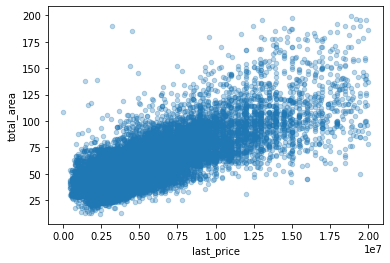

In [40]:
# зависимость средней стоимости квартиры от площади
df_normalized.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3) 


Чем больше общая площадь квартиры, тем выше стоимость

In [41]:
# Зависимость средней стоимости квартиры от количества комнат
pivot_rooms_price = pd.pivot_table(df_normalized,index=['rooms'],values=['last_price'], aggfunc='mean')
pivot_rooms_price.round(1)

,last_price
rooms,
0,2992508.4
1,3791563.7
2,5296225.6
3,6881502.8
4,8786855.9
5,11143381.5
6,13204052.0


Чем больше комнат, тем выше цена. Данная закономерность прослеживается до 7-комнатных квартир. 8-комнатные квартиры и более не стоит рассматривать, так как данные по ним единичны.

In [42]:
df_normalized.corr().sort_values(by='last_price')

,total_images,last_price,total_area,days_exposition,year_of_publication,rooms,ceiling_height,floors_total,floor,living_area,...,studio,open_plan,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,square_meter_cost
city_centers_nearest,-0.036108,-0.360056,-0.204824,-0.049267,0.025548,-0.141380,-0.120208,0.006027,0.006317,-0.199881,...,-0.009936,-0.003811,0.066903,0.273084,1.000000,-0.136569,-0.052904,-0.046019,0.005788,-0.390789
kitchen_total_ratio,-0.024068,-0.112507,-0.375735,-0.041243,0.020237,-0.628242,0.003638,0.368139,0.261057,-0.574404,...,NaN,NaN,0.085232,0.051930,0.009035,-0.080721,0.055187,0.001988,-0.020126,0.270283
ponds_nearest,0.008528,-0.090087,-0.056417,-0.079369,0.038922,-0.023934,-0.069008,0.032078,0.023812,-0.038251,...,0.000752,-0.002987,0.027984,0.016287,0.005788,-0.153570,0.005508,-0.329705,1.000000,-0.071162
studio,-0.028927,-0.059384,-0.099402,-0.022109,0.011874,-0.163160,0.004756,0.071428,0.038513,-0.068020,...,1.000000,-0.004417,0.047109,-0.022492,-0.009936,-0.029450,0.009146,0.003264,0.000752,0.036680
open_plan,-0.023031,-0.039582,-0.060340,-0.023848,-0.021968,-0.098722,0.061505,0.052944,0.037885,-0.039911,...,-0.004417,1.000000,0.050727,-0.013954,-0.003811,-0.012335,0.011234,0.007113,-0.002987,0.013401
airports_nearest,-0.001664,-0.037808,-0.027022,-0.018373,0.009615,-0.057765,-0.034292,0.109071,0.070956,-0.060292,...,-0.022492,-0.013954,0.045641,1.000000,0.273084,0.009694,-0.077046,-0.052470,0.016287,-0.041058
year_of_publication,0.148618,-0.027254,-0.078882,-0.607080,1.000000,-0.048509,-0.023236,0.002386,0.003591,-0.065546,...,0.011874,-0.021968,-0.008095,0.009615,0.025548,-0.028836,-0.033311,-0.034878,0.038922,0.055782
balcony,0.036027,-0.017835,-0.047003,-0.035759,-0.008095,-0.086276,-0.002568,0.186601,0.178220,-0.080101,...,0.047109,0.050727,1.000000,0.045641,0.066903,-0.098043,0.037032,-0.045915,0.027984,0.036480
living_total_ratio,0.002707,0.020343,0.208835,0.009425,0.002213,0.534228,0.014149,-0.374144,-0.270340,0.538981,...,0.092354,0.064639,-0.102387,-0.089263,-0.037909,0.087023,-0.095951,-0.013852,0.026998,-0.223501
parks_nearest,-0.007724,0.062345,0.009036,0.040755,-0.033311,-0.043662,-0.017345,0.092960,0.070290,-0.034002,...,0.009146,0.011234,0.037032,-0.077046,-0.052904,-0.249389,1.000000,0.084346,0.005508,0.093457


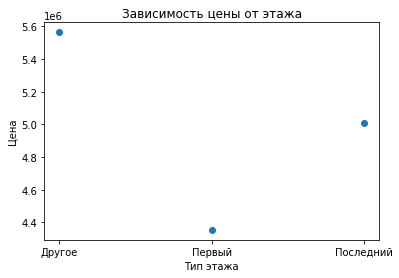

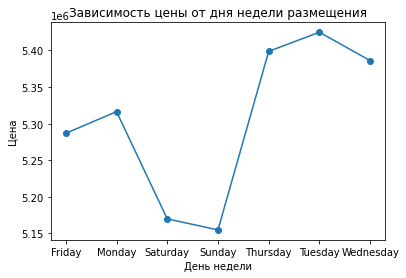

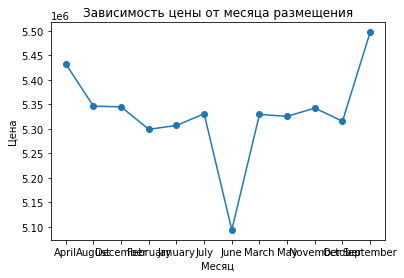

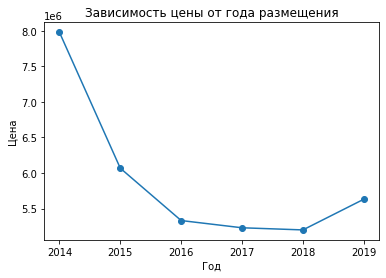

In [43]:
pivot_by_floor=df_normalized.pivot_table(index='full_floor', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_floor.index,pivot_by_floor["mean"]["last_price"], 'o')
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show()

pivot_by_day=df_normalized.pivot_table(index='day_of_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_day.index,pivot_by_day["mean"]["last_price"], 'o-')
plt.title('Зависимость цены от дня недели размещения')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

pivot_by_month_name=df_normalized.pivot_table(index='month_of_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_month_name.index,pivot_by_month_name["mean"]["last_price"], 'o-')
plt.title('Зависимость цены от месяца размещения')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

pivot_by_year=df_normalized.pivot_table(index='year_of_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_year.index,pivot_by_year["mean"]["last_price"], 'o-')
plt.title('Зависимость цены от года размещения')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()


Из построенных графиков видно, что:
1. Стоимость квартир на первом этаже ниже стоимости квартир на последнем этаже и других этажах. Люди готовы платить большую сумму за квартиры, которые не находятся на первом либо последнем этажах. 
2. Наиболее дорогие квартиры размещают на продажу в течении рабочих дней. В выходные дни размещают более дешевые квартиры. 
3. Цена на квартиры заметно снижается в начале лета, в июне. Также, можно заметить, что к концу года средняя стоимость квартир дорожает.
4. Можно заметить, что средняя стоимость квартир была значительно дороже в 2014 году (последствия кризиса). После этого ситуация на рынке недвижимости постепенно нормализовалась и цены на квартиры начали спадать. 

</div> 

In [44]:
# 10 населённых пунктов с наибольшим числом объявлений
df_top10 = df.groupby('locality_name').size().sort_values(ascending=False)
df_top10.head(10)

locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64

In [45]:
# Средняя цена квадратного метра в каждом из населённых пунктов с наибольшим количеством объявлений. 
pivot_top10_mean = (pd.pivot_table(df,index=['locality_name'],values=['square_meter_cost'], aggfunc=['count', 'mean']).sort_values(by=[('count', 'square_meter_cost')],ascending=False))
pivot_top10_mean = pivot_top10_mean.head(10)
pivot_top10_mean

,count,mean
,square_meter_cost,square_meter_cost
locality_name,,
Санкт-Петербург,15721,114849.005788
посёлок Мурино,522,85752.181992
посёлок Шушары,440,78677.379545
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
посёлок Парголово,327,90175.886850
Гатчина,307,68746.110749


In [46]:
top_10_list = pivot_top10_mean.reset_index().locality_name.to_list()

In [47]:
top_10_list

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

(0.0, 200000.0)

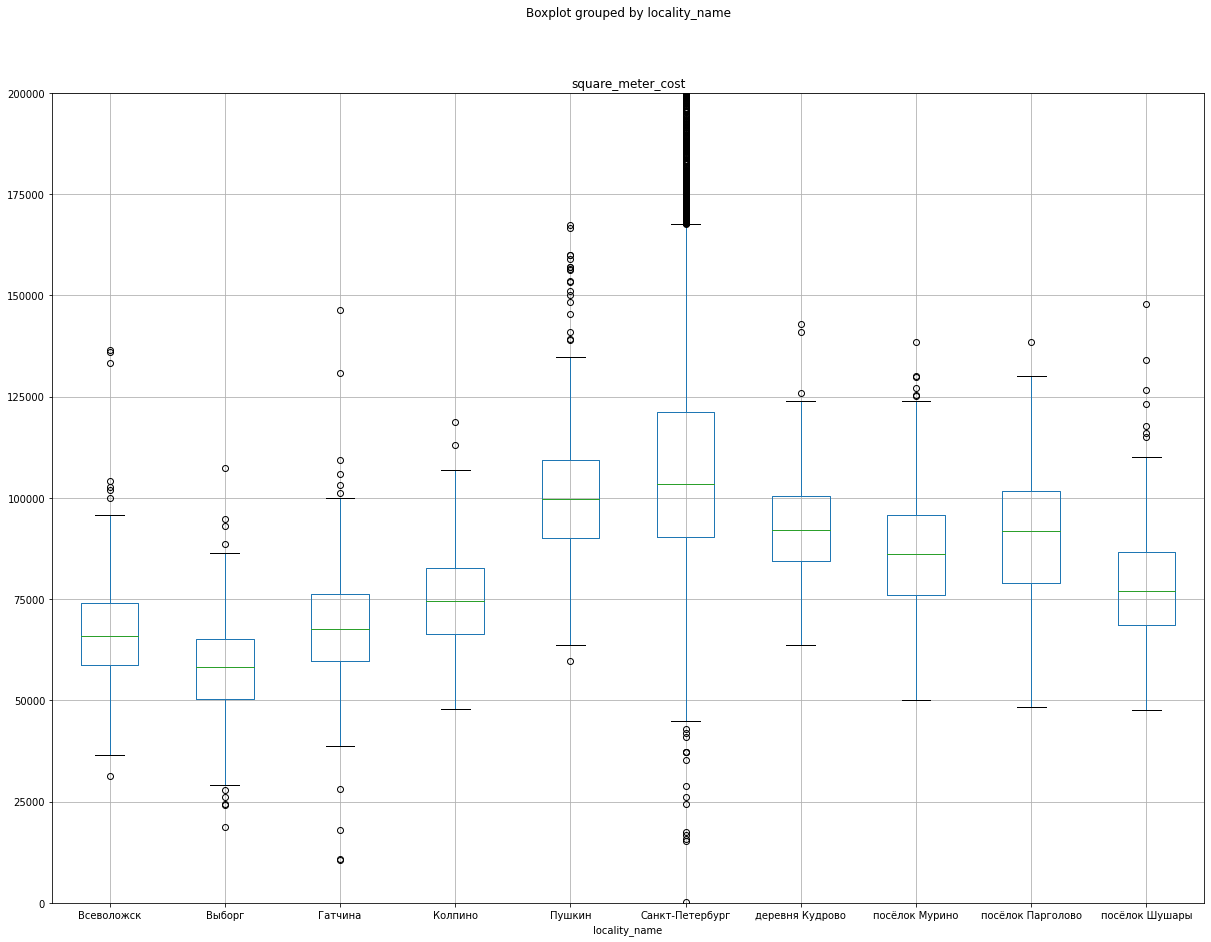

In [48]:
# Строю диаграмму размаха по топ 10 городам
df_normalized[df_normalized.locality_name.isin(top_10_list)].boxplot('square_meter_cost', by='locality_name',figsize=(20,15)).set_ylim(0,200000)

In [49]:
pivot_top10_mean.describe()

,count,mean
,square_meter_cost,square_meter_cost
count,10.000000,10.000000
mean,1895.800000,83602.093769
std,4858.336542,17216.152232
min,237.000000,58141.919831
25%,312.000000,70415.725813
50%,353.500000,82214.780769
75%,429.500000,91899.163184
max,15721.000000,114849.005788


In [50]:
# Населённые  пункты с самой низкой стоимостью жилья
df_top10_cheap = df_normalized.groupby('locality_name')['square_meter_cost'].mean().sort_values(ascending=True)
df_top10_cheap.head(10)

locality_name
деревня Старополье         11206.333333
посёлок станции Свирь      11481.500000
деревня Вахнова Кара       11688.000000
деревня Выскатка           12335.500000
поселок Совхозный          12629.500000
деревня Малая Романовка    12725.000000
поселок Тёсово-4           12931.000000
деревня Бор                13158.000000
деревня Сижно              13710.000000
деревня Ям-Тесово          13711.500000
Name: square_meter_cost, dtype: float64

In [51]:
# Населённые  пункты с самой высокой стоимостью жилья
df_top10_expensive = df_normalized.groupby('locality_name')['square_meter_cost'].mean().sort_values(ascending=False)
df_top10_expensive.head(10)

locality_name
посёлок Лисий Нос    121616.500000
Санкт-Петербург      108556.061786
Зеленогорск          106043.565217
Сестрорецк           102057.414773
Пушкин               101836.292264
Кудрово              100021.596491
деревня Мистолово     98550.000000
посёлок Левашово      96998.000000
Мурино                92722.705882
деревня Кудрово       92706.948980
Name: square_meter_cost, dtype: float64

In [52]:
# Округляю расстояние до центра
df_normalized['center_km'] = round(df_normalized['city_centers_nearest'] / 1000, 0)

In [53]:
# Рассчитываю цену среднюю цену жилья для каждого километра
last_price_km = df_normalized.groupby('center_km')['last_price'].mean()
last_price_km.head(200).round(0)

center_km
0.0     10198571.0
1.0     10450130.0
2.0      9825327.0
3.0      8891307.0
4.0      9190496.0
           ...    
61.0     3200000.0
62.0     3200000.0
63.0     3600000.0
65.0     3475000.0
66.0     3933333.0
Name: last_price, Length: 61, dtype: float64

<AxesSubplot:xlabel='center_km'>

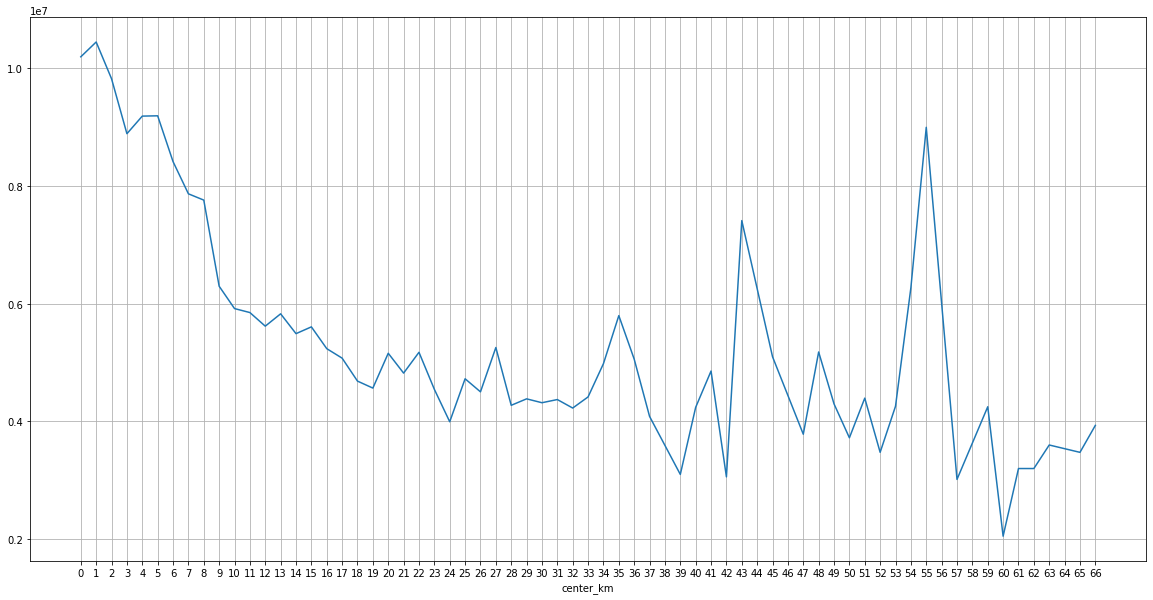

In [54]:
# Строю график, чтобы показать как цена зависит от удалённости от центра

last_price_km.plot(figsize=(20,10), xticks=range(67), grid=True)

Допустим, всё, что находится в пределах 7км от центра города будем считать “центральной” зоной. Скачки на графике на 43км, 55км, возможно связаны с тем, что мы считали расстояние до центра Петербурга, а не до центра различных городов-спутников в отдельности (там тоже есть свои центры, где цена недвижимости выше). 


In [55]:
# Начинаю анализ квартир в центральном сегменте
df_center_spb = df_normalized.query('city_centers_nearest <= 7000')


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

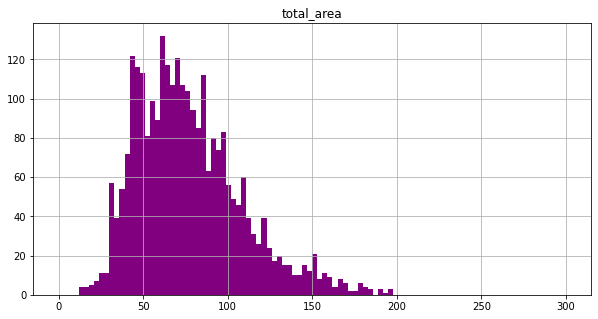

In [56]:
# Распределение в “центральной” зоне квартир по общей площади

df_center_spb.hist(column='total_area', bins=100, range=(0,300), figsize=(10, 5), grid=True, color='purple')

Мы видим большее количество просторных квартир в центральной зоне. В основном представлены квартиры площадью от 30 до 120 квадратных метров. 

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

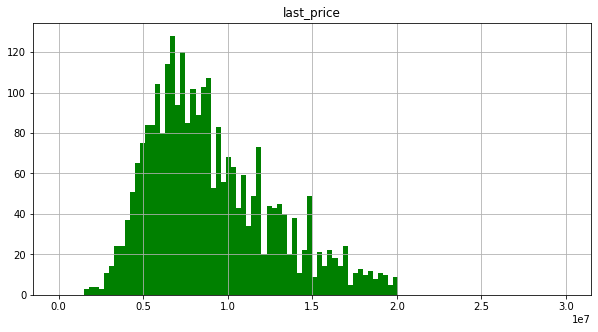

In [57]:
# Распределение квартир по ценам в “центральной” зоне

df_center_spb.hist(column='last_price', range=(1, 30000000), bins=100, figsize=(10, 5), grid=True, color='green')

Стоимость квартир в центре варьируется от 4 до 12 миллионов рублей. 

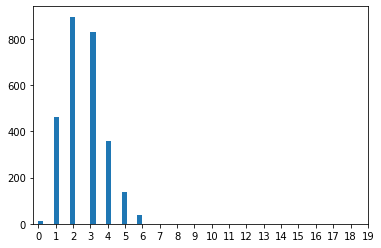

In [58]:
# Распределение квартир по числу комнат в “центральной” зоне

data_rooms = df_center_spb['rooms']

plt.hist(data_rooms, bins=20)
plt.xticks(range(0,20))
plt.show()

Трехкомнатные квартиры наиболее популярны в центре. Чуть меньшим спросом пользуются двухкомнатные квартиры. Также, в центральной зоне больше объявлений, по которым можно приобрести четырехкомнатную или пятикомнатную квартиры (что не так популярно за пределами центра). Бюджетные однокомнатные квартиры представлены на рынке, но пользуются большим спросом за пределами центра.

In [59]:
# Проверяю, что выводы были сделаны правильно
df_center_spb['rooms'].value_counts().sort_index()

0     14
1    464
2    897
3    831
4    359
5    136
6     37
Name: rooms, dtype: int64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

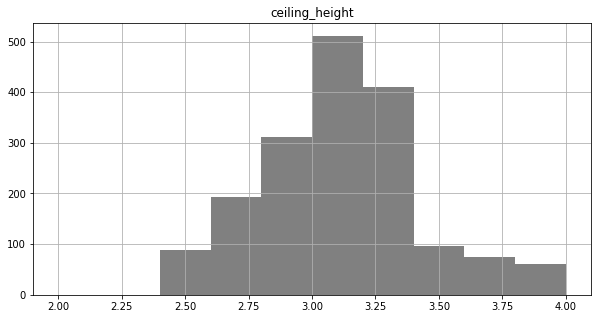

In [60]:
# Распределение квартир по высоте потолков в “центральной” зоне

df_center_spb.hist(column='ceiling_height', range=(2, 4), bins=10, figsize=(10, 5), grid=True, color='grey')

Наиболее популярны квартиры с высокими потолками, от 3 метров и более

In [61]:
print('Среднее время продажи квартиры в центре:', round(df_center_spb['days_exposition'].mean() , 0))
print('Медианное время продажи квартиры в центре:', round(df_center_spb['days_exposition'].median(), 0))

Среднее время продажи квартиры в центре: 243.0
Медианное время продажи квартиры в центре: 136.0


В среднем, квартиры в центре продаются медленнее. Это связано с тем, что стоимость недвижимости в центре дороже и люди дольше прицениваются и делают окончательный выбор. 

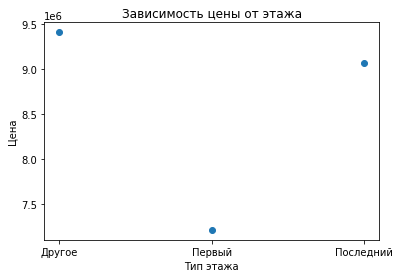

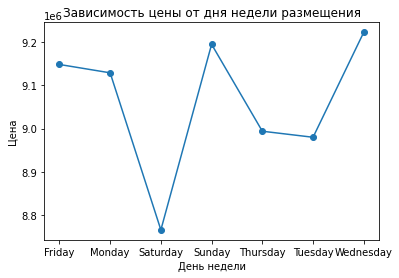

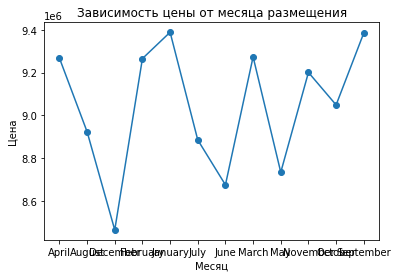

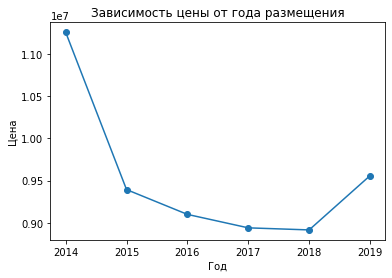

In [62]:
pivot_by_floor=df_center_spb.pivot_table(index='full_floor', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_floor.index,pivot_by_floor["mean"]["last_price"], 'o')
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show()

pivot_by_day=df_center_spb.pivot_table(index='day_of_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_day.index,pivot_by_day["mean"]["last_price"], 'o-')
plt.title('Зависимость цены от дня недели размещения')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

pivot_by_month_name=df_center_spb.pivot_table(index='month_of_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_month_name.index,pivot_by_month_name["mean"]["last_price"], 'o-')
plt.title('Зависимость цены от месяца размещения')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

pivot_by_year=df_center_spb.pivot_table(index='year_of_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_year.index,pivot_by_year["mean"]["last_price"], 'o-')
plt.title('Зависимость цены от года размещения')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()

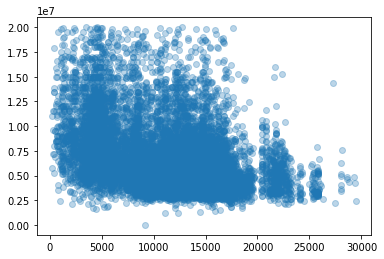

In [63]:
df_center_spb= df_normalized[df_normalized['locality_name']=='Санкт-Петербург']
plt.scatter(x=df_center_spb['city_centers_nearest'], y=df_center_spb['last_price'], alpha=0.3)

In [64]:
df_center_spb=df[df['city_centers_nearest']<7000]
df_center_spb.corr().sort_values(by='last_price')

,total_images,last_price,total_area,days_exposition,year_of_publication,rooms,ceiling_height,floors_total,floor,living_area,...,studio,open_plan,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,square_meter_cost
kitchen_total_ratio,0.040806,-0.094341,-0.329160,-0.010794,0.015965,-0.495131,-0.040649,0.170961,0.046171,-0.459449,...,NaN,NaN,0.087838,0.106743,0.085431,-0.039044,0.110661,0.040570,0.030164,0.136043
ponds_nearest,-0.008068,-0.073288,-0.068779,-0.018412,0.000837,-0.053037,-0.004778,0.060960,0.032623,-0.060135,...,0.023943,-0.002762,0.021193,0.101940,0.302756,-0.199587,0.081248,-0.393716,1.000000,-0.090647
city_centers_nearest,-0.021587,-0.042344,-0.072939,-0.038140,0.041934,-0.157428,-0.107286,0.337280,0.208546,-0.134662,...,0.008985,0.008916,0.162614,0.405283,1.000000,-0.212875,0.098903,-0.330575,0.302756,-0.029459
parks_nearest,-0.044498,-0.039536,-0.073218,0.011801,-0.043041,-0.106674,-0.085369,0.223327,0.125587,-0.095613,...,-0.005851,0.002034,0.139194,0.025681,0.098903,-0.295423,1.000000,-0.008361,0.081248,-0.016109
year_of_publication,0.140156,-0.037849,-0.073918,-0.660574,1.000000,-0.059763,-0.006300,-0.037010,-0.032682,-0.069025,...,0.009021,-0.018645,-0.042558,0.034829,0.041934,-0.002039,-0.043041,-0.019320,0.000837,0.020730
studio,-0.024896,-0.022218,-0.052036,-0.037834,0.009021,-0.114099,0.009362,-0.004975,-0.021421,-0.042402,...,1.000000,-0.002562,0.015817,0.007973,0.008985,-0.039878,-0.005851,0.006697,0.023943,-0.001129
living_total_ratio,-0.020858,-0.009446,0.155701,-0.000724,0.006877,0.421449,0.052181,-0.344038,-0.200880,0.424649,...,0.063591,0.057776,-0.152784,-0.125652,-0.158195,0.109217,-0.157327,-0.020792,-0.027557,-0.141365
open_plan,-0.033013,0.002557,0.004380,-0.027218,-0.018645,-0.049178,0.008185,0.003315,-0.008849,-0.022387,...,-0.002562,1.000000,-0.017394,-0.016413,0.008916,0.012702,0.002034,-0.004950,-0.002762,-0.003433
floors_total,-0.051399,0.045979,-0.013085,0.016761,-0.037010,-0.174892,-0.128675,1.000000,0.648537,-0.123382,...,-0.004975,0.003315,0.357541,0.139943,0.337280,-0.243920,0.223327,-0.041132,0.060960,0.126007
days_exposition,-0.031762,0.060896,0.137839,1.000000,-0.660574,0.130244,0.058492,0.016761,0.028296,0.133361,...,-0.037834,-0.027218,0.007659,-0.007112,-0.038140,0.001375,0.011801,0.003850,-0.018412,0.029197



На стоимость квартир в центре влияет:
1. Стоимость квадратного метра (0.79)
2. Общая площадь (0.60)
3. Жилая площадь (0.51)
4. площадь кухни (0.47)
5. Количество комнат (0.3)
</div> 

## Общий выводы:

Площадь квартиры очень сильно влияет на конечную стоимость жилья <br>
Чем больше комнат в квартире, тем выше будет цена<br>
Чем выше стоимость квадратного метра, тем выше будет рыночная стоимость квартиры<br>
Квартиры на первом этаже стоят дешевле <br>
По мере отдаления от центра города квартиры стоят дешевле<br>
В 2014 году был высокий спрос на квартиры, цены были высокими. В дальнейшем цены на недвижимость постепенно падали<br>
Можно заметить, что люди выставляют более высокие цены на квартиры к концу года


1. В начале работы были выявлены аномалии в данных (квартиры площадью 900кв.м., 19-комнатная квартира, квартира со 100 метровым потолком). От использования этих данных для анализа пришлось отказаться. 
2. Были выявлены причины, которые привели к пропускам данных: <br> 
    
Отсутсвие необходимости заполнять все строки при подаче объявления <br>  
-является объект апартаментами либо нет <br> 
-несвоевременное закрытие объявления (после фактической продажи)<br> 
-площадь кухни, площадь жилой зоны (по отдельности) <br> 
Отсутствие знаний клиента о некоторых параметрах жилья, которое он выставляет на продажу <br> 
Технические проблемы во время отправки данных и обработки данных системой (Геолокация, удалённость от различных объектов) <br> 
Возможно, некорректное указание данных расположения квартиры, что мешает подсчёту расстояний до различных объектов <br> 

3. Были сделаны определенные заключения во время анализа данных: <br> 
-В 2014 году был высокий спрос на квартиры, цены были высокими. В дальнейшем цены на недвижимость постепенно падали <br> 
-Было замечено, что люди выставляют более высокие цены на квартиры к концу года
-Подавляющее количество квартир на рынке от 30 до 75 кв.м. <br> 
-Большинство квартир продаются за сумму от 2 до 7.5 млн.руб.<br> 
-Наибольшей популярностью пользуются 1,2,3 комнатные квартиры. Процент 4-комнатных квартир на рынке значительно ниже. Количество квартир с 5-ю комнатами и более несравнимо ниже.<br> 
-Реальная высота потолков начинается от двух метров и заканчивается на 4,5 метрах.<br> 
-Среднее время продажи квартиры занимает порядка 6 месяцев.<br> 
-Медианное время продажи квартиры занимает чуть больше 3-х месяцев.<br> 
-Можно утверждать, что если квартира продалась в течении 3-х месяцев, то продажу можно называть “быстрой”. Если прошло более 3х месяцев, то продажа - “медленная”.<br> 
-Стоимость квартир на первом этаже ниже стоимости квартир на последнем этаже и других этажах. Люди готовы платить большую сумму за квартиры, которые не находятся на первом либо последнем этажах.<br> 
Наиболее дорогие квартиры размещают на продажу в течении рабочих дней. В выходные дни размещают более дешевые квартиры.<br> 
-Цена на квартиры заметно снижается в начале лета, в июне. Также, можно заметить, что к концу года средняя стоимость квартир дорожает.<br> 
-Можно заметить, что средняя стоимость квартир была значительно дороже в 2014 году (последствия кризиса). После этого ситуация на рынке недвижимости постепенно нормализовалась и цены на квартиры начали спадать.<br> 
-В процессе анализа была выделена “центральная зона” в пределах 7км. <br> <br> 

Выводы сделанные из анализа сегмента квартир, находящихся в центре: <br> 
-Мы видим большее количество просторных квартир в центральной зоне. В основном представлены квартиры площадью от 30 до 120 квадратных метров.<br> 
-Стоимость квартир в центре варьируется от 4 до 12 миллионов рублей.<br> 
-Трехкомнатные квартиры наиболее популярны в центре. Чуть меньшим спросом пользуются двухкомнатные квартиры. Также, в центральной зоне больше объявлений, по которым можно приобрести четырехкомнатную или пятикомнатную квартиры (что не так популярно за пределами центра). Бюджетные однокомнатные квартиры представлены на рынке, но пользуются большим спросом за пределами центра.<br> 
-Наиболее популярны квартиры с высокими потолками, от 3 метров и более <br> 
-В среднем, квартиры в центре продаются медленнее. Это связано с тем, что стоимость недвижимости в центре дороже и люди дольше прицениваются и делают окончательный выбор. <br> 
-На стоимость квартир в центре влияет расстояние до центра,площадь,высота потолков,размер кухни,количество комнат. 

</div> 